In [2]:
%matplotlib inline

import os
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (18, 12)

### Helper Functions

In [4]:
# Helper functions
scan_images = lambda dir_name, ext='.jpg': [ img for img in os.listdir(dir_name) if img.endswith(ext) ]
scan_subdirs = lambda dir_name: [ dir_sub for dir_sub in os.listdir(dir_name) 
                                     if os.path.isdir(os.path.join(dir_name, dir_sub)) ]


### 1. Face Detector

Công việc nhận diện khuôn mặt sử dụng CascadeClassifier với đặc trưng Haar.

In [6]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [7]:
def detect_faces(file_path):
    img = cv2.imread(file_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.15, minNeighbors=15)
    return_faces = []
    
    for (x, y, w, h) in faces:
        fileName = "/tmp/face-"+str(faceId)+ ".jpg"
        cv2.imwrite(fileName, img[y:y+h, x:x+w])
        id, conf = recognizer.predict(gray[y:y+h, x:x+w])

        return_faces.append({
            'xyz': (x, y, w, h),
            'path': fileName,
            'faceId': id,
            'faceName': getFaceName(DBFaces, id)
        })
    return return_faces

def getFaceName(DBFaces, id):
    for face in DBFaces:
        if face['faceId'] == id:
            return face['name']
    return 'unknown'

In [11]:
train_dir = 'face_db'
DBFaces = []
faceId = 0
for file in scan_subdirs(train_dir):
    print('Loading', file)
    file_path = os.path.join(train_dir, file)
    for img in scan_images(file_path):
        # Load the jpg files into numpy arrays
        facesImg = Image.open(os.path.join(file_path, img)).convert('L')
        faceNP = np.array(facesImg, 'uint8')
        
        DBFaces.append({
            'faceId': faceId,
            'name': file,
            'source': os.path.join(file_path, img),
            'faceNP': faceNP
        })
        faceId +=1
        
faces = []
Ids = []
for row in DBFaces:
    faces.append(row['faceNP'])
    Ids.append(row['faceId'])

Loading Hung
Loading user-3
Loading user-4
Loading user-5
Loading user-2
Loading MINHHA
Loading phuong
Loading Quan
Loading girl
Loading user-1
Loading Duyet


### 2. Face Recognizer

Để xây dựng model face recognizer, một phương pháp phổ biến là sử dụng **LBPH (1) (Local Binary Patterns Histograms)** để làm đặc trưng vector cho ảnh khuôn mặt, sau đó sử dụng một phương pháp máy học giám sát bất kỳ để thực hiện việc nhận dạng. Ở bài tập này sử dụng thuật toán KNN (2).

- (1) https://docs.opencv.org/2.4/modules/contrib/doc/facerec/facerec_tutorial.html#local-binary-patterns-histograms
- (2) https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [8]:
recognizer = cv2.face.LBPHFaceRecognizer_create()

In [12]:
# Train model
recognizer.train(faces, np.array(Ids))

# Lưu model vào face_model.yaml để sử dụng sau
recognizer.save("face_model.yml")

### 3. Using Face Recognizer in images

Để sử dụng Face Recoginer model, kết hợp module **Face Detector** để xác định vị trí khuôn mặt trong ảnh, sau đó sử dụng **Face Recognizer** để predict khuôn mặt là ai dựa trên model đã train ở bước 2.

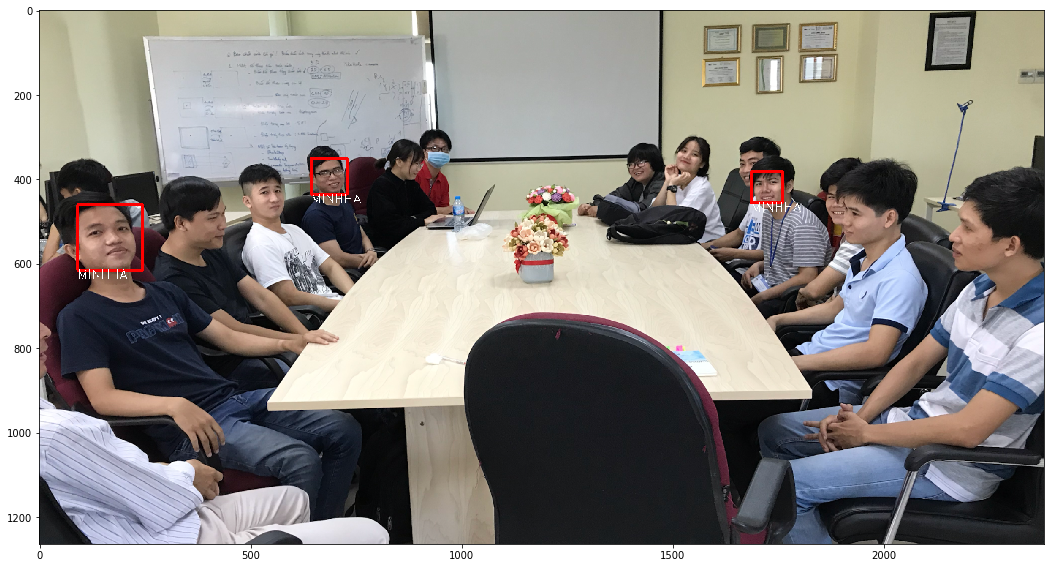

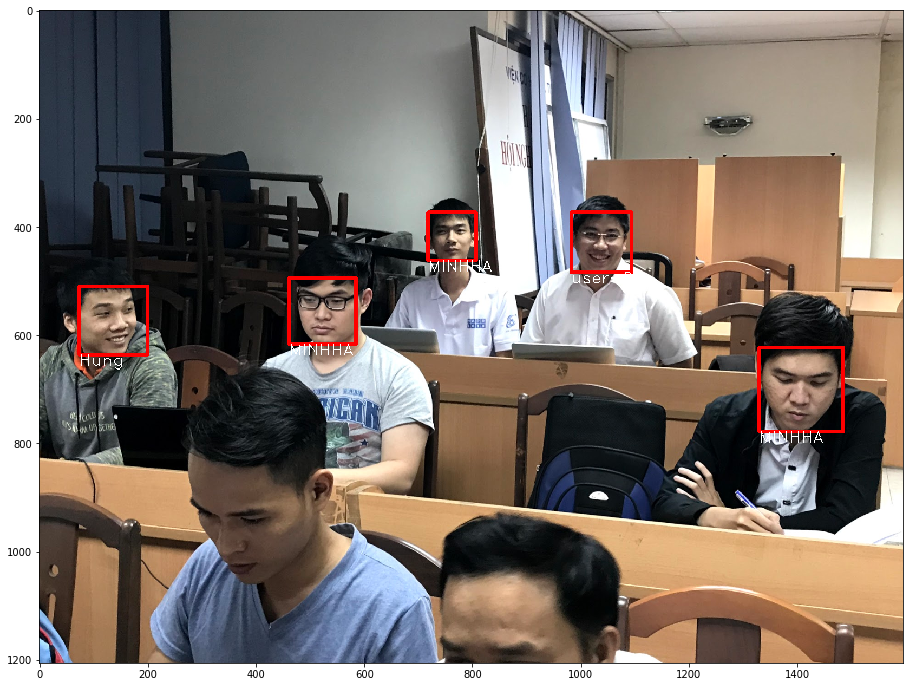

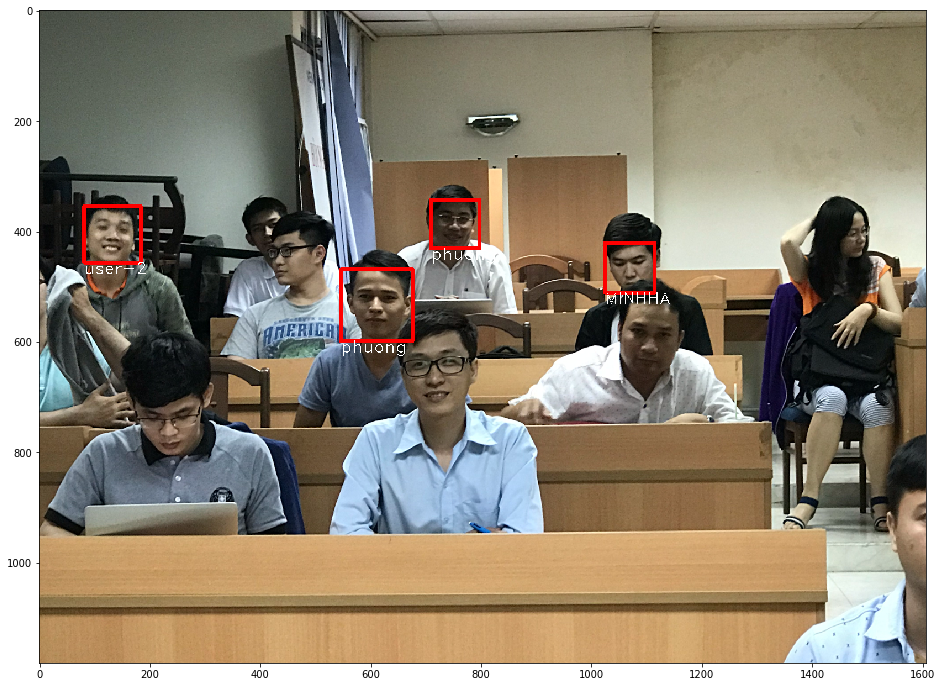

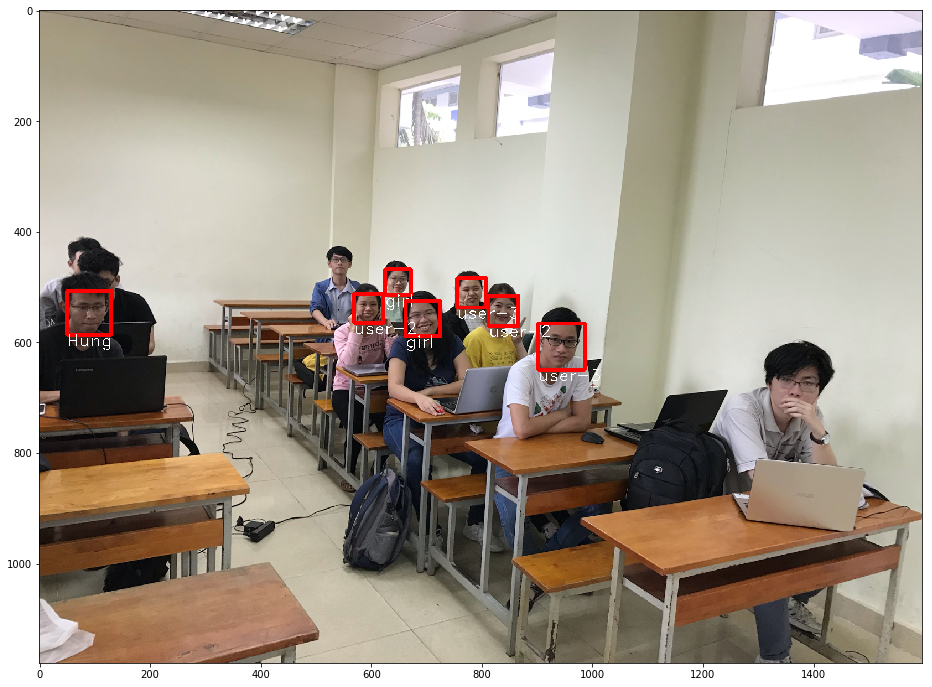

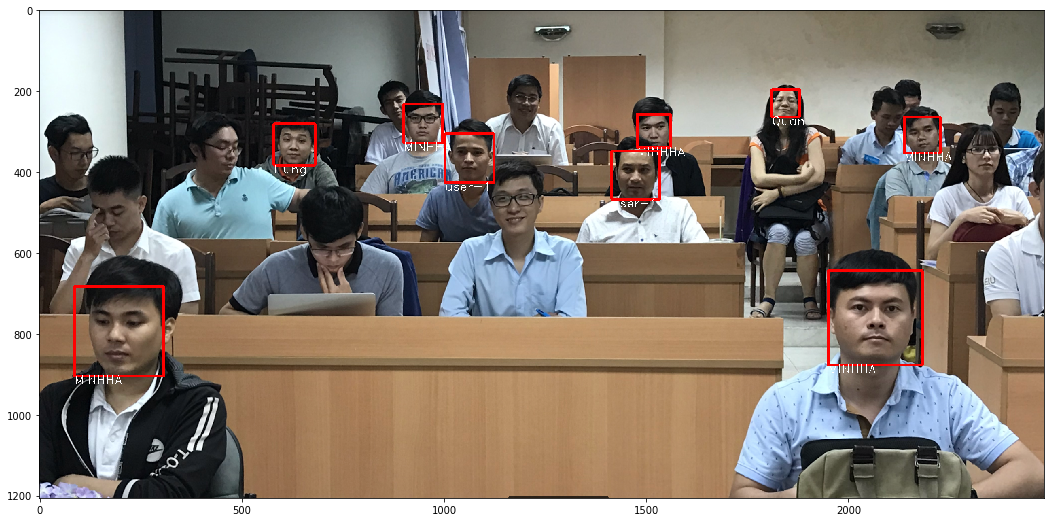

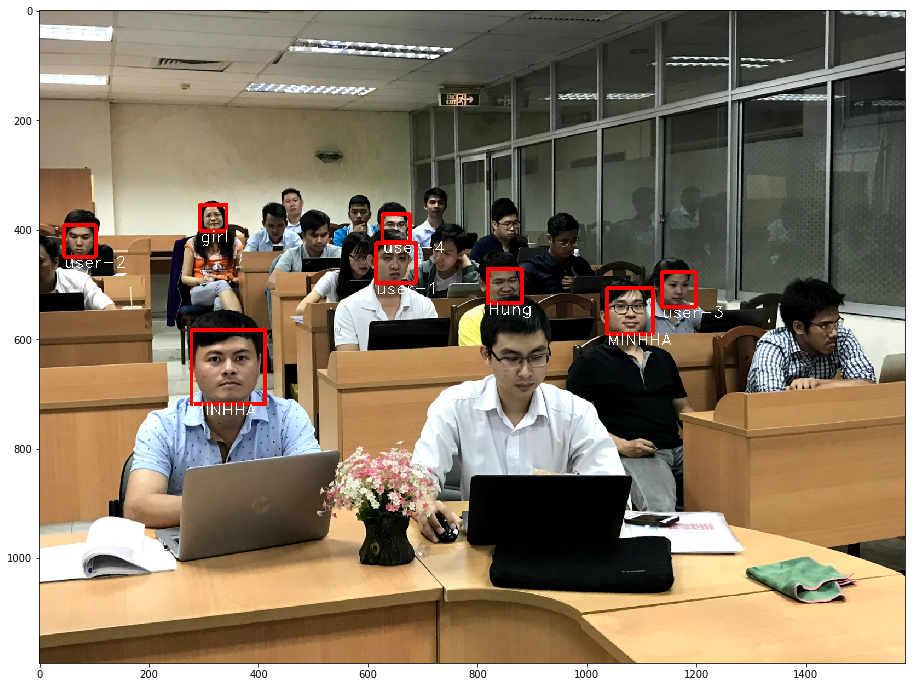

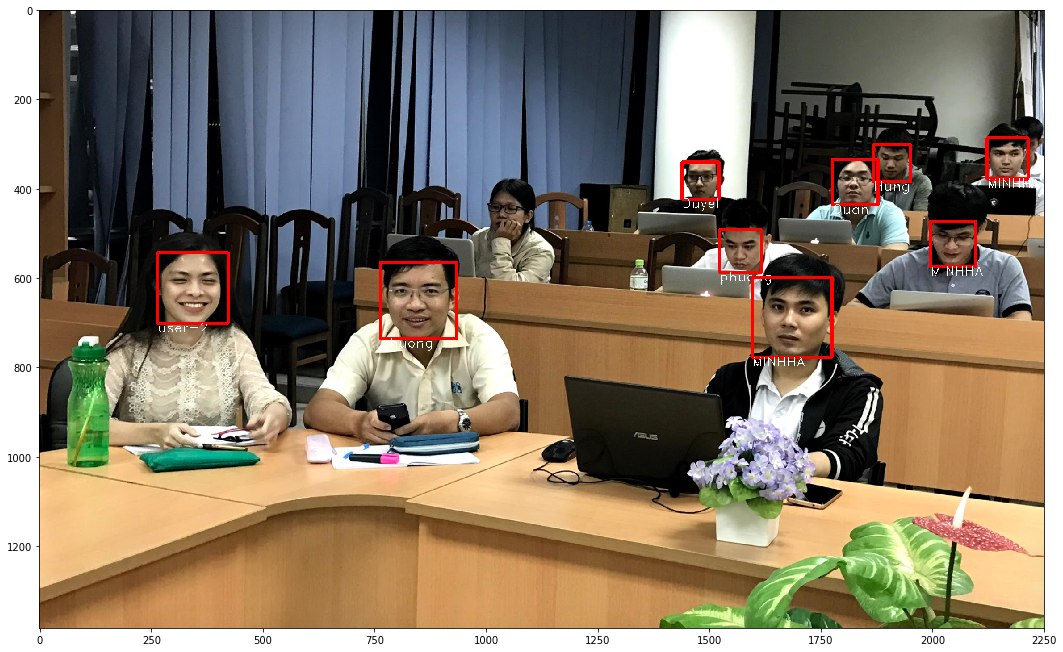

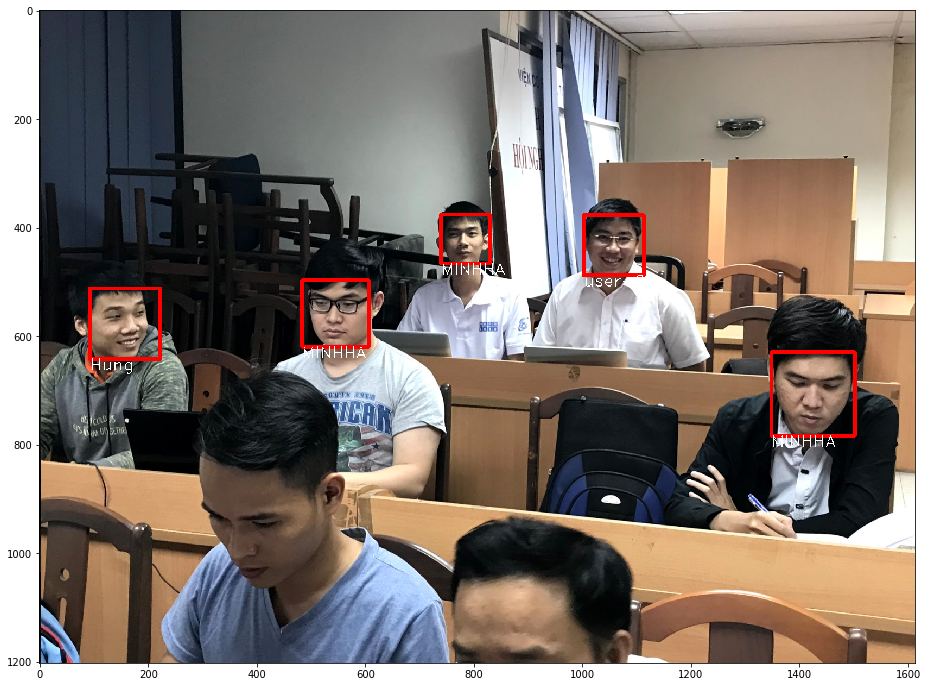

In [19]:
TEST_DIR = 'test'
font = cv2.FONT_HERSHEY_DUPLEX

def predict(image_path):
    detected_face = detect_faces(image_path)
    # print('detected_face', detected_face)
    current_img = cv2.imread(image_path)
    current_img = cv2.cvtColor(current_img, cv2.COLOR_BGR2RGB) 
    
    # Hiển thị tên dự đoán được
    for face in detected_face:
        x, y, w, h = face['xyz']
        cv2.rectangle(current_img, (x, y), (x+w, y+h), (255, 0, 0), 5)
        cv2.putText(current_img, face['faceName'], (x, y + h + 20), font, 1, (255, 255, 255), 1)
        
    plt.imshow(current_img)
    plt.show()
    
for test_file in scan_images(TEST_DIR, ext='.png'):
    test_file_path = os.path.join(TEST_DIR, test_file)
    predict(test_file_path)